In [3]:
!pip install newscatcherapi
!pip install colab-env --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import os
import datetime
import colab_env

from newscatcherapi import NewsCatcherApiClient
from wordcloud import WordCloud, STOPWORDS

from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
colab_env.envvar_handler.envload()
searched_topic = 'Ukraine'
api_key = os.getenv("NEWSCATCHER_API_KEY")

In [6]:
newscatcherapi = NewsCatcherApiClient(x_api_key=api_key)
results = newscatcherapi.get_search(q=searched_topic, lang='en', countries='US', page_size=100)

In [7]:
titles = []
for i in results['articles']:
    titles.append(i['title'])


In [8]:
title_words = ''
stopwords = set(STOPWORDS)

In [9]:
for val in titles:
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    title_words += " ".join(tokens)+" "

### WordCloud

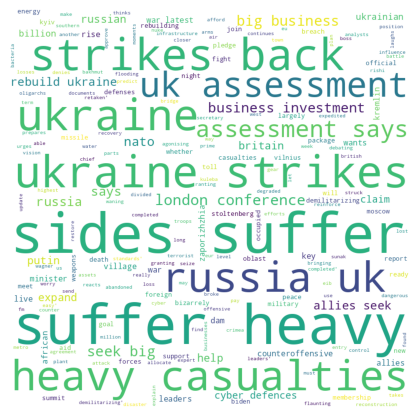

In [36]:
wordcloud = WordCloud(width = 812, height = 812, background_color ='white', stopwords = stopwords, min_font_size = 10, colormap='viridis_r')
wordcloud.generate(title_words)

plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### WordCloud на карте

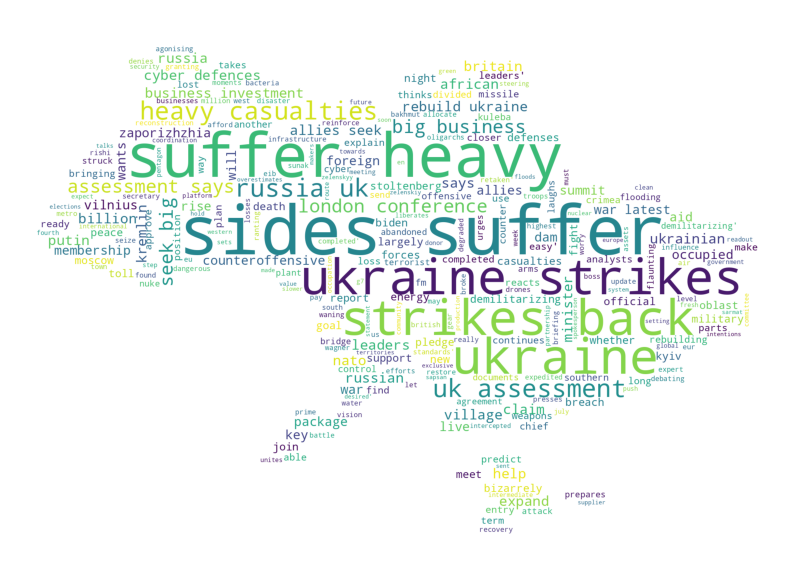

In [33]:
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()
color = np.array(Image.open(os.path.join(d, "/content/gdrive/MyDrive/Colab Notebooks/word-map/assets/ukraine.png")))
color = color[::1, ::1]

mask = color.copy()
mask[mask.sum(axis=2) == 0] = 255

edges = np.mean([gaussian_gradient_magnitude(color[:, :, i] / 255., 2) for i in range(3)], axis=0)
mask[edges > .08] = 255

word_cloud = WordCloud(max_words=2000, relative_scaling=0, mask=mask, width = 800, height = 800, background_color ='#FFFFFF', stopwords = stopwords)

word_cloud.generate(title_words)

plt.figure(figsize = (10, 10), facecolor = None)
plt.axis("off")
plt.imshow(word_cloud)

In [32]:
now = datetime.datetime.now()
word_cloud.to_file(f"/content/gdrive/MyDrive/Colab Notebooks/word-map/results/{now.day}-{now.month}-{now.year}-ukraine-word-map.png")